In [1]:
#caution
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Github/flare-cme/2022

Mounted at /content/drive
/content/drive/MyDrive/Github/flare-cme/2022


In [2]:
!pip install sunpy[all] lime

from IPython.display import clear_output
clear_output()

In [3]:
import numpy as np
import pandas as pd

In [4]:
positive = pd.read_csv('positive_2022.csv')
positive["CME"] = 1
negative = pd.read_csv('negative_2022.csv')
negative["CME"] = 0

In [5]:
data = pd.concat([positive, negative], ignore_index=True)

In [6]:
data

,Unnamed: 0,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,...,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,HARPNUM,NOAA,Class,Peak Time,CME
0,0,2.246101e+22,107.736,0.021724,15533.100,54.882,2975.118,77.983,0.041413,59.541,...,7.077275e+23,50.329,945.314636,4.805,745.287,377,11158,X2.2,2011.02.14_01:56_TAI,1
1,1,2.235615e+22,93.863,-0.001943,10914.060,44.178,1636.710,56.639,-0.003942,50.680,...,4.733711e+23,43.479,961.502686,4.303,63.441,401,11166,M2.0,2011.03.06_14:30_TAI,1
2,2,6.039302e+22,91.233,0.007535,9912.353,29.044,4229.148,49.560,0.015028,41.150,...,1.074422e+24,35.873,1934.446167,4.865,615.008,393,11164,M3.7,2011.03.06_20:12_TAI,1
3,3,2.384940e+22,109.706,0.009620,3703.910,13.500,1505.331,47.602,0.030907,34.321,...,1.879337e+23,28.525,970.551636,3.971,367.530,637,11226,M2.5,2011.06.06_06:41_TAI,1
4,4,1.989983e+22,109.891,0.032849,12062.610,44.090,2547.054,73.681,0.079865,53.270,...,5.269515e+23,43.929,1259.099854,4.777,1080.528,750,11261,M6.0,2011.08.02_13:48_TAI,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,377,7.415288e+22,111.235,-0.014440,10142.720,30.559,6329.881,55.636,-0.034078,42.614,...,1.482763e+24,36.734,3957.617920,5.009,1589.447,8230,13014,M3.0,2022.05.19_07:45_TAI,0
503,378,2.931649e+22,112.732,-0.005219,7231.422,35.073,2462.727,65.444,-0.014124,47.700,...,4.678707e+23,39.452,1989.069946,4.320,254.263,8390,13053,M1.2,2022.07.13_04:31_TAI,0
504,379,4.118574e+22,85.999,0.005067,10046.240,37.757,2472.216,45.647,0.010444,46.940,...,8.168017e+23,41.358,1465.274292,4.591,310.188,8402,13055,M1.4,2022.07.15_15:39_TAI,0
505,380,5.901715e+21,126.231,0.021628,7852.986,37.339,627.644,76.218,0.058771,50.605,...,1.020593e+23,41.407,299.992493,4.149,211.627,8507,13078,M1.1,2022.08.14_21:53_TAI,0


## Plotting histograms to see the variability of the data

In [7]:
data = data.drop(['Unnamed: 0','HARPNUM','NOAA','Class','Peak Time'], axis=1)

In [8]:
X = data.drop(columns=['CME'])
y = data['CME']

In [9]:
from sklearn.preprocessing import MinMaxScaler

def normalize_the_data(data):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)
    return normalized_data

xn = normalize_the_data(X)

In [10]:
columns = ['USFLUX', 'MEANGBT', 'MEANJZH', 'MEANPOT', 'SHRGT45', 'TOTUSJH',
       'MEANGBH', 'MEANALP', 'MEANGAM', 'MEANGBZ', 'MEANJZD', 'TOTUSJZ',
       'SAVNCPP', 'TOTPOT', 'MEANSHR', 'AREA_ACR', 'R_VALUE', 'ABSNJZH','CME']

df = pd.concat([pd.DataFrame(xn), pd.DataFrame(y)], axis=1)
df.columns = columns

df

,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,MEANJZD,TOTUSJZ,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,CME
0,0.110342,0.540594,0.690394,0.605487,0.871939,0.204824,0.753790,0.678962,0.937815,0.565928,0.483415,0.202952,0.114476,0.133011,0.900055,0.128267,0.875866,0.193364,1
1,0.109806,0.378813,0.507880,0.415653,0.699841,0.109642,0.451634,0.462796,0.712539,0.353911,0.504681,0.132131,0.028793,0.088537,0.712075,0.130544,0.784360,0.015724,1
2,0.304362,0.348143,0.580972,0.374485,0.456517,0.294006,0.351421,0.553205,0.470255,0.363660,0.286493,0.311960,0.339951,0.202599,0.503348,0.267394,0.886803,0.159422,1
3,0.117444,0.563567,0.597047,0.119330,0.206602,0.100299,0.323702,0.628887,0.296639,0.489462,0.399728,0.123382,0.190494,0.034370,0.301701,0.131817,0.723843,0.094947,1
4,0.097242,0.565724,0.776187,0.462856,0.698426,0.174382,0.692889,0.862225,0.778385,0.546176,0.664586,0.172255,0.445302,0.098705,0.724424,0.172403,0.870762,0.280703,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.374743,0.581398,0.411501,0.383953,0.480875,0.443401,0.437435,0.319167,0.507474,0.562199,0.420726,0.484258,0.426469,0.280090,0.526976,0.551965,0.913051,0.413291,0
503,0.145408,0.598855,0.482612,0.264304,0.553451,0.168385,0.576282,0.414267,0.636777,0.518423,0.508051,0.217441,0.113502,0.087494,0.601564,0.275077,0.787459,0.065438,0
504,0.206118,0.287107,0.561937,0.379987,0.596604,0.169060,0.296026,0.531361,0.617456,0.264357,0.402936,0.199841,0.087096,0.153710,0.653869,0.201403,0.836857,0.080008,0
505,0.025642,0.756274,0.689651,0.289849,0.589884,0.037882,0.728804,0.761687,0.710632,0.734388,0.755419,0.047584,0.109449,0.018073,0.655214,0.037499,0.756289,0.054330,0


In [11]:
pos = df[df['CME'] == 1]
neg = df[df['CME'] == 0]

## ANALYSIS

In [12]:
from sklearn.feature_selection import f_classif
from sklearn.datasets import make_classification

X = df.drop(columns=['CME'])
y = df['CME']

from sklearn.feature_selection import SelectKBest, f_classif

N_features = 18
a = np.array(X)
b = np.array(y)

selector = SelectKBest(f_classif, k=N_features)
selector.fit(a,b)
scores = selector.scores_
print(scores)



[ 5.20354549  0.32960907  1.90745138  5.79661047  1.00038713 10.07641461
  5.52914548  2.90929789  1.4817048   1.6586397   1.75817397  8.89922951
  2.47016364  8.27497002  1.08287283  7.43726656  3.35027402  0.94751516]


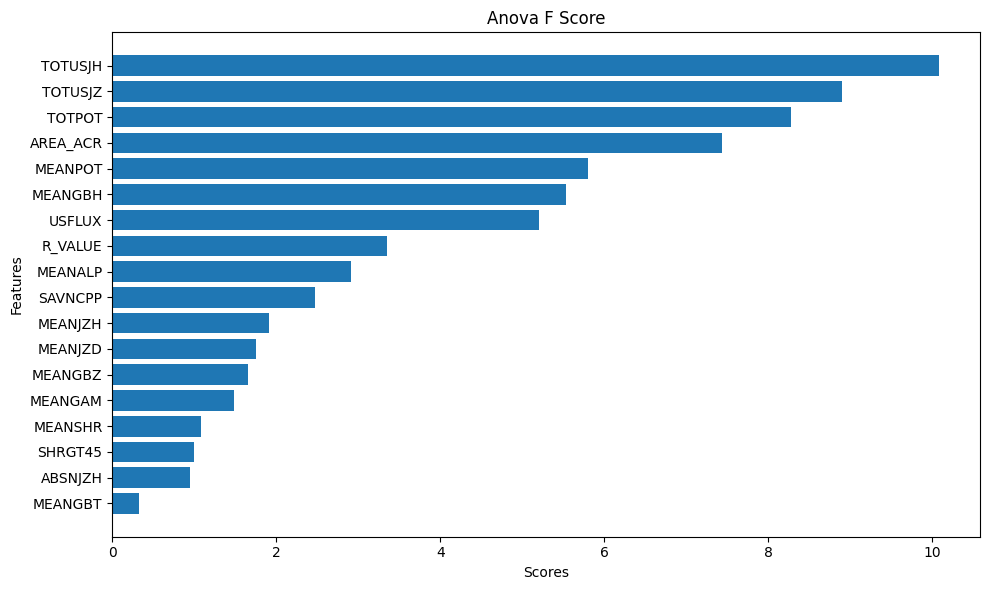

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = X.columns
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': scores}).sort_values('Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(scores_df['Feature'], scores_df['Score'])
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('Anova F Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

ordered_features = scores_df['Feature'].tolist()
ordered_features.append("CME")

In [14]:
df_reordered = df.loc[:, ordered_features]

In [15]:
df_reordered

,TOTUSJH,TOTUSJZ,TOTPOT,AREA_ACR,MEANPOT,MEANGBH,USFLUX,R_VALUE,MEANALP,SAVNCPP,MEANJZH,MEANJZD,MEANGBZ,MEANGAM,MEANSHR,SHRGT45,ABSNJZH,MEANGBT,CME
0,0.204824,0.202952,0.133011,0.128267,0.605487,0.753790,0.110342,0.875866,0.678962,0.114476,0.690394,0.483415,0.565928,0.937815,0.900055,0.871939,0.193364,0.540594,1
1,0.109642,0.132131,0.088537,0.130544,0.415653,0.451634,0.109806,0.784360,0.462796,0.028793,0.507880,0.504681,0.353911,0.712539,0.712075,0.699841,0.015724,0.378813,1
2,0.294006,0.311960,0.202599,0.267394,0.374485,0.351421,0.304362,0.886803,0.553205,0.339951,0.580972,0.286493,0.363660,0.470255,0.503348,0.456517,0.159422,0.348143,1
3,0.100299,0.123382,0.034370,0.131817,0.119330,0.323702,0.117444,0.723843,0.628887,0.190494,0.597047,0.399728,0.489462,0.296639,0.301701,0.206602,0.094947,0.563567,1
4,0.174382,0.172255,0.098705,0.172403,0.462856,0.692889,0.097242,0.870762,0.862225,0.445302,0.776187,0.664586,0.546176,0.778385,0.724424,0.698426,0.280703,0.565724,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.443401,0.484258,0.280090,0.551965,0.383953,0.437435,0.374743,0.913051,0.319167,0.426469,0.411501,0.420726,0.562199,0.507474,0.526976,0.480875,0.413291,0.581398,0
503,0.168385,0.217441,0.087494,0.275077,0.264304,0.576282,0.145408,0.787459,0.414267,0.113502,0.482612,0.508051,0.518423,0.636777,0.601564,0.553451,0.065438,0.598855,0
504,0.169060,0.199841,0.153710,0.201403,0.379987,0.296026,0.206118,0.836857,0.531361,0.087096,0.561937,0.402936,0.264357,0.617456,0.653869,0.596604,0.080008,0.287107,0
505,0.037882,0.047584,0.018073,0.037499,0.289849,0.728804,0.025642,0.756289,0.761687,0.109449,0.689651,0.755419,0.734388,0.710632,0.655214,0.589884,0.054330,0.756274,0


In [16]:
pos = df_reordered[df_reordered['CME'] == 1]
neg = df_reordered[df_reordered['CME'] == 0]

In [17]:
min_a = pos.index.min()
max_a = pos.index.max()

pos['normalized_event_number'] = (pos.index - min_a) / (max_a - min_a)

min_b = neg.index.min()
max_b = neg.index.max()

neg['normalized_event_number'] = (neg.index - min_b) / (max_b - min_b)

<ipython-input-17-9e7b8b34ef1e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos['normalized_event_number'] = (pos.index - min_a) / (max_a - min_a)
<ipython-input-17-9e7b8b34ef1e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg['normalized_event_number'] = (neg.index - min_b) / (max_b - min_b)


In [18]:
import numpy as np
import matplotlib.pyplot as plt

a = 1
plt.figure(figsize=(12, 80))

for i in range(len(columns) - 1):
    mean_pos = np.mean(pos.iloc[:, i])
    mean_neg = np.mean(neg.iloc[:, i])
    std_pos = np.std(pos.iloc[:,i])
    std_neg = np.std(neg.iloc[:,i])

    plt.subplot(len(columns), 2, a)
    plt.scatter(pos["normalized_event_number"], pos.iloc[:, i], alpha=0.7, label="Positive Events")
    plt.scatter(neg["normalized_event_number"], neg.iloc[:, i], alpha=0.7, label="Negative Events")
    plt.axhline(mean_pos, color='b', label=f"Mean Pos: {mean_pos:.2f}")
    plt.axhline(mean_neg, color='r', label=f"Mean Neg: {mean_neg:.2f}")
    plt.xlabel("Normalized Event Number")
    plt.ylabel(ordered_features[i])
    plt.title(f"{ordered_features[i]} vs Normalized Event Number")
    plt.legend()

    plt.subplot(len(columns), 2, a + 1)
    plt.hist(pos.iloc[:, i], bins=20, density=True, alpha=0.7)
    plt.hist(neg.iloc[:, i], bins=20, density=True, alpha=0.7)
    plt.axvline(mean_pos, color='b', label=f"Mean Pos: {mean_pos:.2f}")
    plt.axvline(mean_neg, color='r', label=f"Mean Neg: {mean_neg:.2f}")
    ymin, ymax = plt.ylim()
    plt.fill_betweenx([ymin, ymax], mean_pos - std_pos, mean_pos + std_pos, color='b', alpha=0.2)
    plt.fill_betweenx([ymin, ymax], mean_neg - std_neg, mean_neg + std_neg, color='r', alpha=0.2)
    plt.xlabel(ordered_features[i])
    plt.ylabel('Probability Density')
    plt.title(f'PDF of {ordered_features[i]}')
    plt.legend()

    a += 2

plt.tight_layout()
plt.savefig("2022_parameters_pdf.jpeg")
plt.show()

Output hidden; open in https://colab.research.google.com to view.